In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df= pd.read_csv("D:\\machine learning\\Datasets\\New folder\\accepted.csv")

C:\Users\Laptop\AppData\Local\Temp\ipykernel_5512\2550797402.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("D:\\machine learning\\Datasets\\New folder\\accepted.csv")


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [9]:
df["grade"].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G', nan], dtype=object)

In [10]:
df1= pd.read_csv("D:\\machine learning\\Datasets\\New folder\\rejected_2007_to_2018Q4.csv")

In [11]:
df1.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [17]:
features = ['int_rate', 'grade', 'installment', 'dti', 'total_pymnt', 'out_prncp', 'annual_inc', 'fico_range_low', 'fico_range_high', 'open_acc', 'total_acc', 'revol_bal', 'revol_util', 'inq_last_6mths', 'delinq_amnt', 'delinq_2yrs', 'loan_status', 'earliest_cr_line', 'emp_length', 'home_ownership', 'loan_amnt', 'purpose', 'term', 'addr_state', 'sub_grade', 'application_type', 'pub_rec_bankruptcies', 'pub_rec', 'mort_acc', 'percent_bc_gt_75']
df = df[features]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 30 columns):
 #   Column                Dtype  
---  ------                -----  
 0   int_rate              float64
 1   grade                 object 
 2   installment           float64
 3   dti                   float64
 4   total_pymnt           float64
 5   out_prncp             float64
 6   annual_inc            float64
 7   fico_range_low        float64
 8   fico_range_high       float64
 9   open_acc              float64
 10  total_acc             float64
 11  revol_bal             float64
 12  revol_util            float64
 13  inq_last_6mths        float64
 14  delinq_amnt           float64
 15  delinq_2yrs           float64
 16  loan_status           object 
 17  earliest_cr_line      object 
 18  emp_length            object 
 19  home_ownership        object 
 20  loan_amnt             float64
 21  purpose               object 
 22  term                  object 
 23  addr_st

In [19]:
df.head()

,int_rate,grade,installment,dti,total_pymnt,out_prncp,annual_inc,fico_range_low,fico_range_high,open_acc,...,loan_amnt,purpose,term,addr_state,sub_grade,application_type,pub_rec_bankruptcies,pub_rec,mort_acc,percent_bc_gt_75
0,13.99,C,123.03,5.91,4421.723917,0.00,55000.0,675.0,679.0,7.0,...,3600.0,debt_consolidation,36 months,PA,C4,Individual,0.0,0.0,1.0,0.0
1,11.99,C,820.28,16.06,25679.660000,0.00,65000.0,715.0,719.0,22.0,...,24700.0,small_business,36 months,SD,C1,Individual,0.0,0.0,4.0,7.7
2,10.78,B,432.66,10.78,22705.924294,0.00,63000.0,695.0,699.0,6.0,...,20000.0,home_improvement,60 months,IL,B4,Joint App,0.0,0.0,5.0,50.0
3,14.85,C,829.90,17.06,31464.010000,15897.65,110000.0,785.0,789.0,13.0,...,35000.0,debt_consolidation,60 months,NJ,C5,Individual,0.0,0.0,1.0,0.0
4,22.45,F,289.91,25.37,11740.500000,0.00,104433.0,695.0,699.0,12.0,...,10400.0,major_purchase,60 months,PA,F1,Individual,0.0,0.0,6.0,60.0


In [20]:
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [26]:
len(df)

2260701

<AxesSubplot:xlabel='loan_status', ylabel='count'>

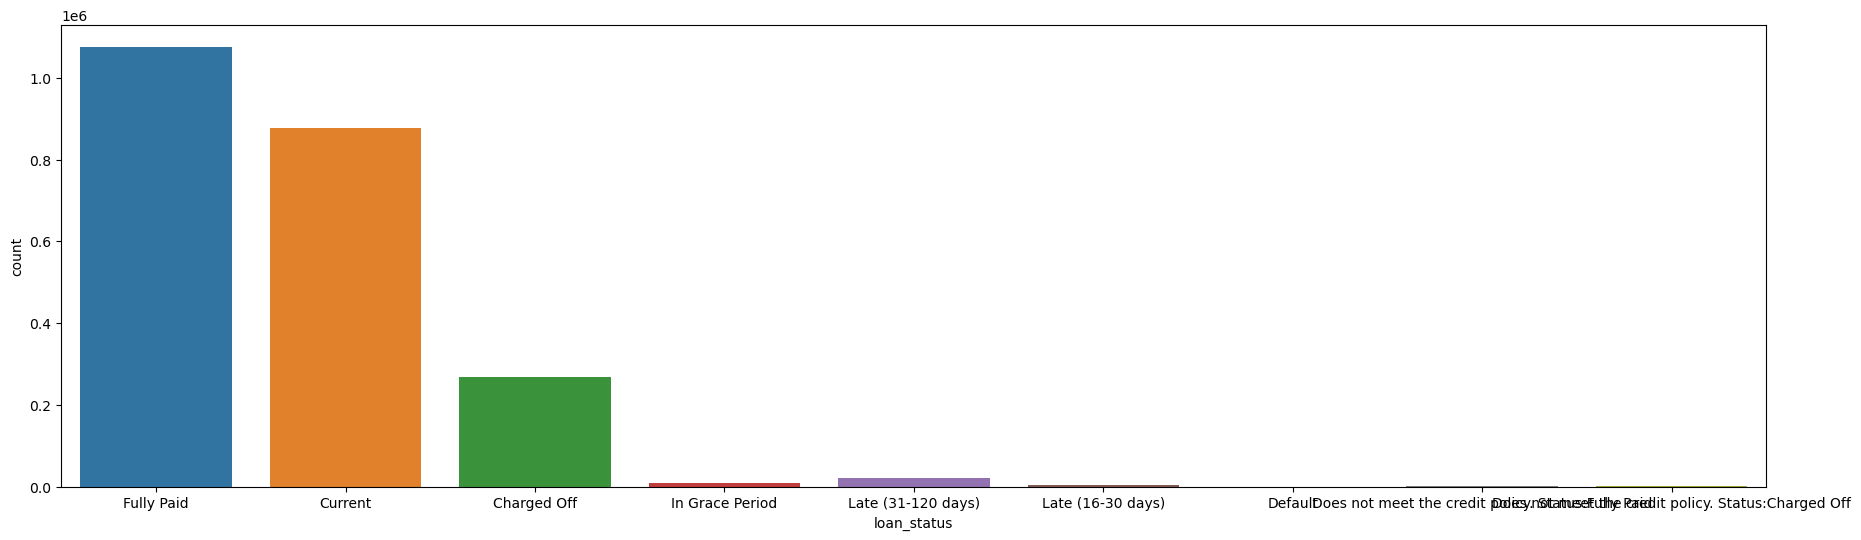

In [31]:
plt.figure(figsize=(22, 6))
sns.countplot(x="loan_status", data=df)

In [32]:
df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)